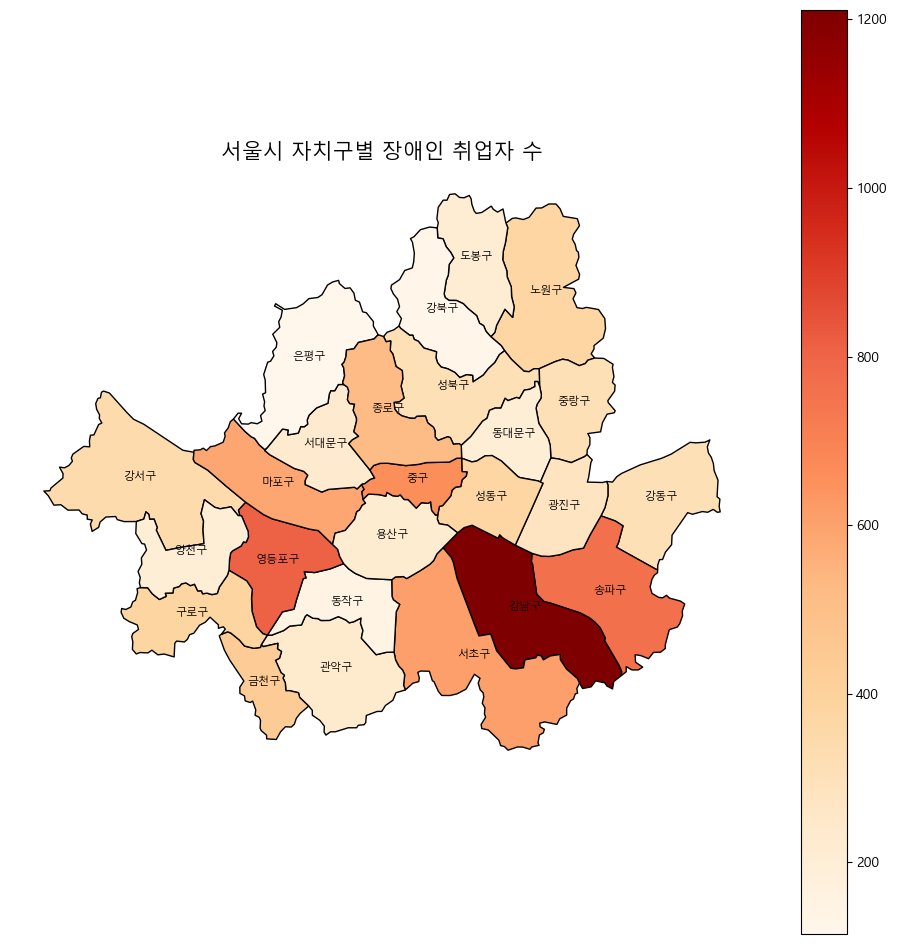

In [48]:
#자치구 데이터 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# 파일 경로
file_path = 'C:/Users/bluecom002/Desktop/공모전/장애인 취업정보 자치구 뽑아낸거.csv'
geojson_path = 'C:/Users/bluecom002/Desktop/공모전/seoul_municipalities_geo_simple.json'
# 데이터 로드
data = pd.read_csv(file_path)
# 자치구별 취업자 수 집계
borough_counts = data['자치구'].value_counts()
borough_counts_df = borough_counts.reset_index()
borough_counts_df.columns = ['자치구', '취업자 수']
# 서울시 자치구 지리적 경계 데이터 로드
seoul_map = gpd.read_file(geojson_path)
# 데이터 병합
merged_data = seoul_map.set_index('name').join(borough_counts_df.set_index('자치구'))
merged_data['취업자 수'] = merged_data['취업자 수'].fillna(0)
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_data.plot(column='취업자 수', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('서울시 자치구별 장애인 취업자 수', fontsize=15)
# 자치구 이름 추가
for idx, row in merged_data.iterrows():
    plt.annotate(text=idx, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)
ax.axis('off')
plt.show()

In [32]:
!pip install geopandas

In [23]:
# 예시 데이터프레임을 생성하거나 실제 데이터프레임을 불러와서 사용하세요
data = {'Y': [37.5722440, ...], 'X': [126.9759352, ...]}
target_df = pd.DataFrame(data)

# 나머지 코드는 그대로 유지
latitude = target_df['Y']
longitude = target_df['X']

temp = pd.Series()
temp.Y = 37.5722440
temp.X = 126.9759352
main_location = (temp.Y, temp.X)

map_shic = folium.Map(location=main_location, zoom_start=8)
map_shic



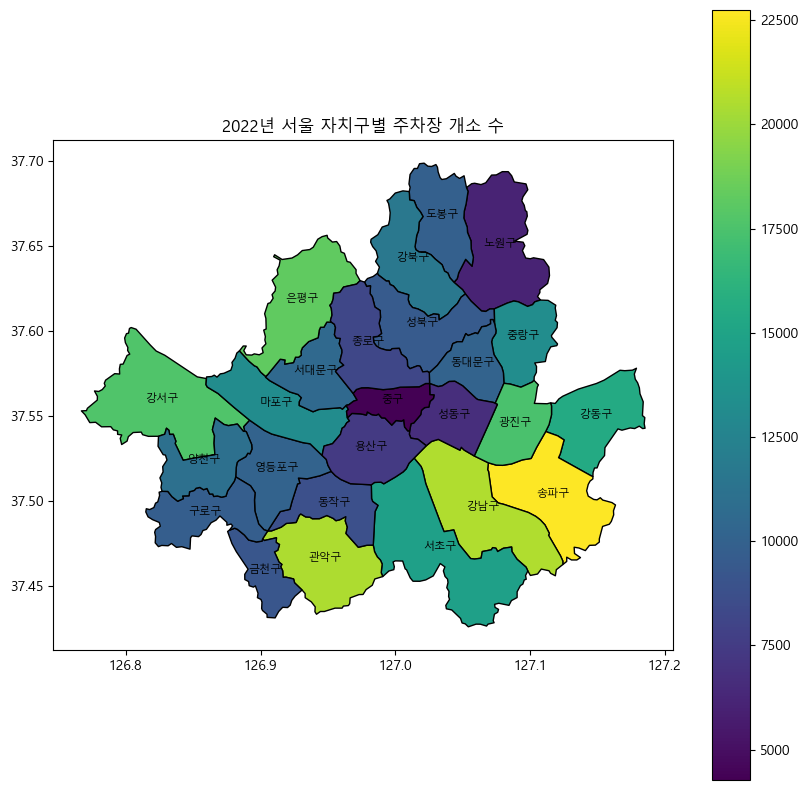

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

# Set a font that supports Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Change this path to the font file on your system
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 주차장 데이터 불러오기
file_path = r'C:/Users/bluecom002/Desktop/공모전/주차장(동별)(2016년+이후)_20240118202906.csv'
parking_data = pd.read_csv(file_path)
# 필요한 컬럼만 선택하고, 자치구별로 그룹화하여 주차장 개소 수 합계 계산
parking_data_by_district = parking_data[['동별', '2022']].rename(columns={'동별': '자치구', '2022': '주차장 개소 수'})
# Filter out non-numeric values in the '주차장 개소 수' column
parking_data_by_district = parking_data_by_district[parking_data_by_district['주차장 개소 수'].apply(lambda x: x.isnumeric())]
# Convert the '주차장 개소 수' column to integers
parking_data_by_district['주차장 개소 수'] = parking_data_by_district['주차장 개소 수'].astype(int)
# 자치구별 주차장 개수 합계 계산
parking_totals_by_district = parking_data_by_district.groupby('자치구').sum()
# 경계 데이터 불러오기
boundary_file_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_boundary = gpd.read_file(boundary_file_path)
# 주차장 데이터와 경계 데이터 병합
seoul_parking_map = seoul_boundary.merge(parking_totals_by_district, left_on='name', right_on='자치구')
# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
seoul_parking_map.plot(column='주차장 개소 수', ax=ax, legend=True, cmap='viridis', edgecolor='black')
# 자치구 이름 표시
for idx, row in seoul_parking_map.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', fontsize=8)
ax.set_title('2022년 서울 자치구별 주차장 개소 수')
plt.show()
